3
gist_gray


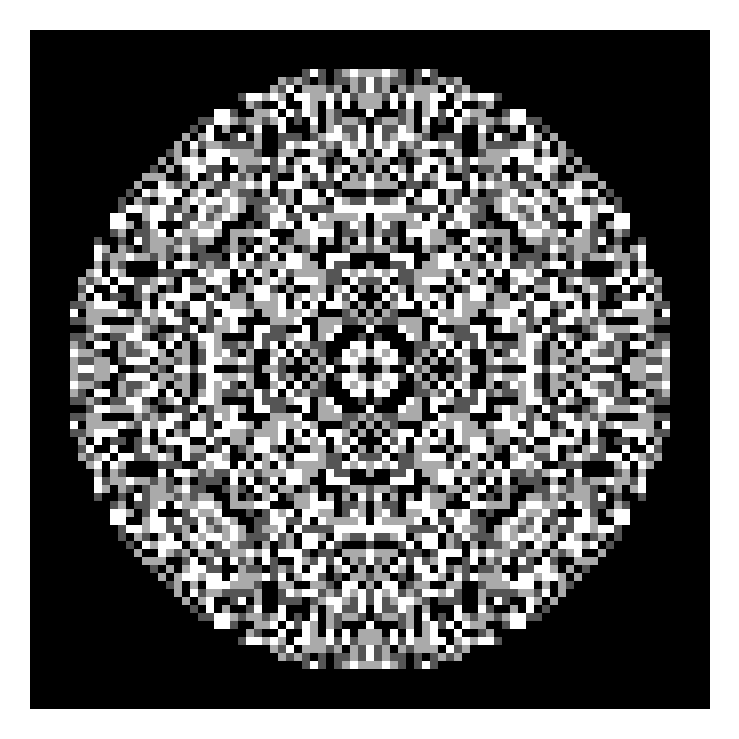

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import choice, random, randint

maxp = 5
mask = randint(2, maxp-1)
mask = 3
print(mask)

def step(g):
    #print('g11: \n', g)

    a = g//maxp

    #print('a: \n', a)

    g &= mask
    #g %= mask

    #print('g: \n', g)

    g[1:]  += a[:-1]
    g[:-1] += a[1:]

    g[:, 1:]  += a[:, :-1]
    g[:, :-1] += a[:, 1:]

    g[0] += a[1]
    g[:, 0] += a[:, 1]

def step2(g):
    pass

def nd(g, n):
    for y in range(0, n):
        for x in range(0, n):
            if g[y, x] > maxp-1:
                return True
    return False

def main(i):
    size = math.ceil(math.sqrt(i)/2.7)+3  #+120
    size = 43
    grid = np.zeros((size, size), dtype=np.uint64)
    grid[0, 0] = i

    # grid[0, 1] = i//2
    # grid[1, 0] = i//2

    #grid[1, 1] = i - 10

    while nd(grid, size):
        for t in range(100):
            step(grid)
    return prep_grid(grid)

def prep_grid(G):
    U = np.block([[np.flip(G),                      np.delete(np.flip(G, 0), 0, 1)      ],
                  [np.delete(np.flip(G, -1), 0, 0), np.delete(np.delete(G, 0, 1), 0, 0) ]])
    return U


#G = main(9545535554555345353 - int(10**(1 + random()*3)))
#G = main(int(10**(1 + random()*8)))
G = main( 900000000000000000)

#print(G)

cmap = choice( ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
cmap = 'copper'
cmap = 'gist_gray'
print(cmap)
size = 3
plt.figure(num = None, figsize=(size, size), dpi=300)
plt.axis('off')
plot = plt.imshow(G, cmap = cmap)#, interpolation='bicubic' )
plt.show()
plt.close()